# 单变量测试
# 该程序由 4部分组成
## 1.数据加载
## 2.数据处理
## 3.模型编写训练(该部分)
## 4.模型预测并可视化

In [1]:
import os
File_Path = []
File_Path.append(os.getcwd()[:] +'\\saveModel\\')      #获取到当前文件的目录，并检查是否有对应文件夹，如果不存在则自动新建文件
File_Path.append(os.getcwd()[:] +'\\saveData\\')
File_Path.append(os.getcwd()[:] +'\\saveData\\oneInput\\')
File_Path.append(os.getcwd()[:] +'\\saveImage\\')
for str in File_Path:
    if not os.path.exists(str):
        os.makedirs(str)
    else:
        print(str + "文件夹已存在，无需创建")


F:\jupyter\Deep_Learning\Classification\GAN\saveModel\文件夹已存在，无需创建
F:\jupyter\Deep_Learning\Classification\GAN\saveData\文件夹已存在，无需创建
F:\jupyter\Deep_Learning\Classification\GAN\saveData\oneInput\文件夹已存在，无需创建
F:\jupyter\Deep_Learning\Classification\GAN\saveImage\文件夹已存在，无需创建


# GAN模型编写并在训练集上进行训练

In [2]:
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
#from main.feature import get_all_features
from tensorflow.keras.layers import GRU, LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras import Sequential,Input,Model
from pickle import load
from tensorflow import keras
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)
import warnings
warnings.filterwarnings('ignore')

X_train = np.load("./saveData/X_train.npy", allow_pickle=True)
y_train = np.load("./saveData/y_train.npy", allow_pickle=True)
X_test = np.load("./saveData/X_test.npy", allow_pickle=True)
y_test = np.load("./saveData/y_test.npy", allow_pickle=True)
X_val = np.load("./saveData/X_val.npy", allow_pickle=True)
y_val = np.load("./saveData/y_val.npy", allow_pickle=True)
yc_train = np.load("./saveData/yc_train.npy", allow_pickle=True)
yc_test = np.load("./saveData/yc_test.npy", allow_pickle=True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [3]:
X_train.shape

(31068, 3, 2)

In [4]:
y_train.shape

(31068, 3)

In [5]:
X_test.shape

(3884, 3, 2)

In [6]:
y_test.shape

(3884, 3)

In [7]:
yc_train.shape

(31068, 3, 1)

In [8]:
X_train

array([[[-0.42760943, -0.66237942],
        [-0.49494949, -0.67202572],
        [-0.50841751, -0.66237942]],

       [[-0.49494949, -0.67202572],
        [-0.50841751, -0.66237942],
        [-0.44107744, -0.66237942]],

       [[-0.50841751, -0.66237942],
        [-0.44107744, -0.66237942],
        [-0.45454545, -0.67524116]],

       ...,

       [[-0.82491582, -0.89710611],
        [-0.81818182, -0.89710611],
        [-0.82491582, -0.89067524]],

       [[-0.81818182, -0.89710611],
        [-0.82491582, -0.89067524],
        [-0.82491582, -0.89389068]],

       [[-0.82491582, -0.89067524],
        [-0.82491582, -0.89389068],
        [-0.82491582, -0.88424437]]])

In [9]:
y_train

array([[0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [19]:
#生成器
#def make_generator_model(input_dim, output_dim, feature_size) -> tf.keras.models.Model:
n_sequence = X_train.shape[1]
n_features = X_train.shape[2]
g_output_dim = y_train.shape[1] 

#Parameters
LR = 0.00016
BATCH_SIZE = 64
N_EPOCH = 20
dropout = 0.2



METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]
def make_generator_model():
    print("model dim: ", input_dim, output_dim)
    model = Sequential()
    model.add(LSTM(256, return_sequences=True, input_shape=(n_sequence,n_features), batch_size=None))
    model.add(Dropout(dropout))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(dropout))
    model.add(LSTM(64))
    model.add(Dropout(dropout))
    model.add(Dense(g_output_dim, activation='softmax'))
    #model.add(Activation('softmax'))
    #model.compile(loss='categorical_crossentropy', optimizer=Adam(lr = LR),metrics=METRICS)

#     history = model.fit(X_train, y_train, epochs=N_EPOCH, batch_size=BATCH_SIZE, validation_data=(X_val, y_val),
#                         verbose=1, shuffle=False)

#     pyplot.plot(history.history['loss'], label='train')
#     pyplot.plot(history.history['val_loss'], label='validation')
#     pyplot.legend()
#     pyplot.show()
    return model

#     model = Sequential()
#     model.add(GRU(units=1024, return_sequences = True, input_shape=(input_dim, feature_size),
#                   recurrent_dropout=0.2))
#     model.add(GRU(units=512, return_sequences = True, recurrent_dropout=0.2)) # 256, return_sequences = True
#     model.add(GRU(units=256, recurrent_dropout=0.2)) #, recurrent_dropout=0.1
#     # , recurrent_dropout = 0.2
#     model.add(Dense(128))
#     # model.add(Dense(128))
#     model.add(Dense(64))
#     #model.add(Dense(16))
#     model.add(Dense(units=output_dim))
#     return model


#判别器
def make_discriminator_model():
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(units=128, input_shape=((n_sequence+1) * n_features,), activation=None, kernel_initializer='random_normal'))
    #model.add(tf.keras.layers.LeakyReLU(alpha=0.3))
    model.add(tf.keras.layers.GaussianNoise(stddev=0.2))
    model.add(Dropout(0.3))
    model.add(Dense(units=100, activation=None, kernel_initializer='random_normal'))
    #model.add(tf.keras.layers.LeakyReLU(alpha=0.3))
    model.add(Dropout(0.3))
    model.add(Dense(units=10, activation=None, kernel_initializer='random_normal'))
    #model.add(tf.keras.layers.LeakyReLU(alpha=0.3))
    model.add(Dropout(0.3))
    #model.add(Dense(1 ,activation='softmax'))
    model.add(Dense(g_output_dim ,activation='softmax'))
    #model.compile(loss='discriminator_loss', optimizer=Adam(lr = LR),metrics=METRICS)
    #model.compile(loss=discriminator_loss)
    #model.summary()
    #history = model.fit(data_gen_train, validation_data=data_gen_test, epochs = 100, 
    #                   callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5))
    return model

In [11]:
def result_to_0_1(y):
        if(tf.is_tensor(y)):
            y = y.numpy()
            for i in range(y.shape[0]):
                max_index = 0
                if(y[i][max_index] < y[i][1]):
                    max_index = 1
                if(y[i][max_index] < y[i][2]):
                    max_index = 2
                list_temp = [0,1,2]
                list_temp.pop(max_index)
                y[i][max_index] = 1
                y[i][list_temp[0]] = 0
                y[i][list_temp[1]] = 0
        else:
            for i in range(y.shape[0]):
                max_index = 0
                if(y[i][max_index] < y[i][1]):
                    max_index = 1
                if(y[i][max_index] < y[i][2]):
                    max_index = 2
                list_temp = [0,1,2]
                list_temp.pop(max_index)
                y[i][max_index] = 1
                y[i][list_temp[0]] = 0
                y[i][list_temp[1]] = 0
        return y
    

# 将yc转化为float64
yc_train = yc_train.astype(np.float32)
yc_test = yc_test.astype(np.float32)



In [12]:
(n_sequence+1) * n_features

8

In [13]:
yc_test

array([[[0.],
        [0.],
        [1.]],

       [[1.],
        [0.],
        [0.]],

       [[1.],
        [0.],
        [0.]],

       ...,

       [[1.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [1.]],

       [[0.],
        [1.],
        [0.]]], dtype=float32)

In [14]:
type(yc_train[0][0][0])

numpy.float32

In [15]:
yc_train[0][0][0]

0.0

In [16]:
class GAN:
    #opt为参数，比如学习率等
    #generator生成器
    #discriminator判别器
    def __init__(self, generator, discriminator, opt):
        self.opt = opt
        self.lr = opt["lr"]
        self.generator = generator
        self.discriminator = discriminator
        #二进制交叉熵
        #self.cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
        #self.cross_entropy = tf.keras.backend.categorical_crossentropy(from_logits=True)
        #生成器即模型的训练优化器 adam
        self.generator_optimizer = tf.keras.optimizers.Adam(lr=self.lr)
        #判别器的优化器
        self.discriminator_optimizer = tf.keras.optimizers.Adam(lr=self.lr)
        self.batch_size = self.opt['bs']
        self.checkpoint_dir = '../training_checkpoints'
        self.checkpoint_prefix = os.path.join(self.checkpoint_dir, "ckpt")
        self.checkpoint = tf.train.Checkpoint(generator_optimizer=self.generator_optimizer,
                                              discriminator_optimizer=self.discriminator_optimizer,
                                              generator=self.generator,
                                              discriminator=self.discriminator)

    #判别器损失函数
    #多分类器，需要使用softmax_cross_entropy_with_logits,计算logits和lable之间的softmax交叉熵
    def discriminator_loss(self, y_true,real_output, fake_output):
        #real_loss = self.cross_entropy(tf.ones_like(real_output), real_output)
        #fake_loss = self.cross_entropy(tf.zeros_like(fake_output), fake_output)
        real_loss = tf.reduce_mean(tf.keras.backend.categorical_crossentropy(y_true, real_output,from_logits=False))
        fake_loss = tf.reduce_mean(tf.keras.backend.categorical_crossentropy(tf.zeros_like(fake_output), fake_output,from_logits=False))
        total_loss = tf.add(real_loss,fake_loss)
        return total_loss
    #生成器损失函数
    def generator_loss(self,y_true ,fake_output):
        #return self.cross_entropy(tf.ones_like(fake_output), fake_output)
        return tf.reduce_mean(tf.keras.backend.categorical_crossentropy(y_true, fake_output,from_logits=False))
    
    # 获取评价指标

    # %%----------generator生成器的获取评价指标方法----------
    def get_metrics_gen(self, y_true,y_predicted):
        # y_true = y_true.numpy()
        # y_predicted = y_predicted.numpy()
        # print(y_true.shape)
        # print(y_predicted.shape)
        # print(y_true)
        # print(y_predicted)
        y_predicted = y_predicted.numpy()
        #需要把预测的结果转化，即按概率大小把y_predicted转化成0,1
        for i in range(y_predicted.shape[0]):
            max_index = 0
            if(y_predicted[i][max_index] < y_predicted[i][1]):
                max_index = 1
            if(y_predicted[i][max_index] < y_predicted[i][2]):
                max_index = 2
            list_temp = [0,1,2]
            list_temp.pop(max_index)
            y_predicted[i][max_index] = 1
            y_predicted[i][list_temp[0]] = 0
            y_predicted[i][list_temp[1]] = 0
        #y_true = y_true.numpy()
        y_predicted = y_predicted.astype(np.int32)
        METRIC={'tp':0,'fp':0,'tn':0,'fn':0,'accuracy':0,'precision':0,'recall':0,'auc':0,'prc':0}
        tp = tf.keras.metrics.TruePositives()
        tp.update_state(y_true,y_predicted)
        METRIC['tp'] = tp.result().numpy()
        #print(METRIC['tp'])
        
 
        fp = tf.keras.metrics.FalsePositives()
        fp.update_state(y_true, y_predicted)
        METRIC['fp'] = fp.result().numpy()
        

        tn = tf.keras.metrics.TrueNegatives()
        tn.update_state(y_true,y_predicted)
        METRIC['tn'] = tn.result().numpy()
        
   
        fn = tf.keras.metrics.FalseNegatives()
        fn.update_state(y_true,y_predicted)
        METRIC['fn'] = fn.result().numpy()
        
  
        accuracy = tf.keras.metrics.Accuracy()
        accuracy.update_state(y_true,y_predicted)
        METRIC['accuracy'] = accuracy.result().numpy()
        
        precision = tf.keras.metrics.Precision()
        precision.update_state(y_true,y_predicted)
        METRIC['precision'] = precision.result().numpy()
        
        recall = tf.keras.metrics.Recall()
        recall.update_state(y_true,y_predicted)
        METRIC['recall'] = recall.result().numpy()
        
        auc = tf.keras.metrics.AUC()
        auc.update_state(y_true,y_predicted)
        METRIC['auc'] = auc.result().numpy()
        
        prc = tf.keras.metrics.AUC(curve='PR')
        prc.update_state(y_true,y_predicted)
        METRIC['prc'] = prc.result().numpy()
        return METRIC,y_true
        
    # %%----------discriminator生成器的获取评价指标方法----------
    def get_metrics_disc(self, y_true,y_predicted):
        # y_true = y_true.numpy()
        # y_predicted = y_predicted.numpy()
        # print(y_true.shape)
        # print(y_predicted.shape)
        # print(y_true)
        # print(y_predicted)
        if(tf.is_tensor(y_predicted)):
            y_predicted = y_predicted.numpy()
        #y_true = y_true.numpy()
        #y_predicted = y_predicted.astype(np.int32)
                #需要把预测的结果转化，即按概率大小把y_predicted转化成0,1
        for i in range(y_predicted.shape[0]):
            max_index = 0
            if(y_predicted[i][max_index] < y_predicted[i][1]):
                max_index = 1
            if(y_predicted[i][max_index] < y_predicted[i][2]):
                max_index = 2
            list_temp = [0,1,2]
            list_temp.pop(max_index)
            y_predicted[i][max_index] = 1
            y_predicted[i][list_temp[0]] = 0
            y_predicted[i][list_temp[1]] = 0
        if(tf.is_tensor(y_true)):    
            y_true = y_true.numpy()
        #y_true = y_true.numpy()
        #y_true = y_true.astype(np.int32)
                #需要把预测的结果转化，即按概率大小把y_predicted转化成0,1
        for i in range(y_true.shape[0]):
            max_index = 0
            if(y_true[i][max_index] < y_true[i][1]):
                max_index = 1
            if(y_true[i][max_index] < y_true[i][2]):
                max_index = 2
            list_temp = [0,1,2]
            list_temp.pop(max_index)
            y_true[i][max_index] = 1
            y_true[i][list_temp[0]] = 0
            y_true[i][list_temp[1]] = 0
            
        METRIC={'tp':0,'fp':0,'tn':0,'fn':0,'accuracy':0,'precision':0,'recall':0,'auc':0,'prc':0}
        tp = tf.keras.metrics.TruePositives()
        tp.update_state(y_true,y_predicted)
        METRIC['tp'] = tp.result().numpy()
        #print(METRIC['tp'])
        
 
        fp = tf.keras.metrics.FalsePositives()
        fp.update_state(y_true, y_predicted)
        METRIC['fp'] = fp.result().numpy()
        

        tn = tf.keras.metrics.TrueNegatives()
        tn.update_state(y_true,y_predicted)
        METRIC['tn'] = tn.result().numpy()
        
   
        fn = tf.keras.metrics.FalseNegatives()
        fn.update_state(y_true,y_predicted)
        METRIC['fn'] = fn.result().numpy()
        
  
        accuracy = tf.keras.metrics.Accuracy()
        accuracy.update_state(y_true,y_predicted)
        METRIC['accuracy'] = accuracy.result().numpy()
        
        precision = tf.keras.metrics.Precision()
        precision.update_state(y_true,y_predicted)
        METRIC['precision'] = precision.result().numpy()
        
        recall = tf.keras.metrics.Recall()
        recall.update_state(y_true,y_predicted)
        METRIC['recall'] = recall.result().numpy()
        
        auc = tf.keras.metrics.AUC()
        auc.update_state(y_true,y_predicted)
        METRIC['auc'] = auc.result().numpy()
        
        prc = tf.keras.metrics.AUC(curve='PR')
        prc.update_state(y_true,y_predicted)
        METRIC['prc'] = prc.result().numpy()
        return METRIC
        
    
    
    @tf.function
    def train_step(self, real_x, real_y, yc):
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            #缺少一个打乱数据real_x的操作，即同时打乱real_x,real_y,yc
            
            generated_data = self.generator(real_x, training=True)
            generated_data_reshape = tf.reshape(generated_data, [generated_data.shape[0], generated_data.shape[1], 1])
            d_fake_input = tf.concat([tf.cast(generated_data_reshape, tf.float32), yc], axis=1)
            real_y_reshape = tf.reshape(real_y, [real_y.shape[0], real_y.shape[1], 1])
            d_real_input = tf.concat([tf.cast(real_y_reshape, tf.float32), yc], axis=1)

            # Reshape for MLP
            # d_fake_input = tf.reshape(d_fake_input, [d_fake_input.shape[0], d_fake_input.shape[1]])
            # d_real_input = tf.reshape(d_real_input, [d_real_input.shape[0], d_real_input.shape[1]])

            real_output = self.discriminator(d_real_input, training=True)
            fake_output = self.discriminator(d_fake_input, training=True)
            
            # #将结果转化成0,1
            # real_output = result_to_0_1(real_output)
            # fake_output = result_to_0_1(fake_output)
            
            #gen_loss = self.generator_loss(fake_output)
            gen_loss = self.generator_loss(real_y.astype(np.float32), fake_output)
            disc_loss = self.discriminator_loss(real_y.astype(np.float32), real_output, fake_output)
            
           
           # gen_metric,y_true_gen = self.get_metrics_gen(real_y,generated_data)
            gen_metric,y_true_gen = self.get_metrics_gen(real_y,fake_output)
            disc_metric1 = self.get_metrics_disc(real_y,real_output)
            disc_metric2 = self.get_metrics_disc(tf.zeros_like(fake_output),fake_output)
            disc_metric = {}
            
            for key,value in disc_metric2.items():
                disc_metric[key] = (disc_metric1[key]+disc_metric2[key])/2
            #disc_metric2 = self.get_metrics_disc(,fake_output)
            #disc_metric = self.get_metrics_disc(y_true_gen,fake_output)
            print("1")
            
        gradients_of_generator = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)

        self.generator_optimizer.apply_gradients(zip(gradients_of_generator, self.generator.trainable_variables))
        self.discriminator_optimizer.apply_gradients(
            zip(gradients_of_discriminator, self.discriminator.trainable_variables))
        return real_y, generated_data, {'d_loss': disc_loss, 'g_loss': gen_loss},gen_metric, disc_metric
    


    def train(self, real_x, real_y, yc, opt):
        train_hist = {}
        train_hist['D_losses'] = []
        train_hist['G_losses'] = []
        train_hist['per_epoch_times'] = []
        train_hist['total_ptime'] = []
        train_hist['D_tp'] = []
        train_hist['G_tp'] = []
        train_hist['D_fp'] = []
        train_hist['G_fp'] = []
        
        train_hist['D_tn'] = []
        train_hist['G_tn'] = []
        
        train_hist['D_fn'] = []
        train_hist['G_fn'] = []
        
        train_hist['D_accuracy'] = []
        train_hist['G_accuracy'] = []
        
        train_hist['D_precision'] = []
        train_hist['G_precision'] = []
        train_hist['D_recall'] = []
        train_hist['G_recall'] = []
        train_hist['D_auc'] = []
        train_hist['G_auc'] = []
        train_hist['D_prc'] = []
        train_hist['G_prc'] = []
        
        
        #加入分类任务指标
        #1.tp
        #2.fp
        #3.tn 
        #4.fn  
        #5.accuracy  
        #6.precision  
        #7.recall  
        #8.auc 
        #9.prc
        
        
        epochs = opt["epoch"]
        for epoch in range(epochs):
            start = time.time()

            real_price, fake_price, loss, gen_metric, disc_metric = self.train_step(real_x, real_y, yc)

            G_losses = []
            D_losses = []

            Real_price = []
            Predicted_price = []
            
            D_losses.append(loss['d_loss'].numpy())
            G_losses.append(loss['g_loss'].numpy())

            Predicted_price.append(fake_price.numpy())
            #Real_price.append(real_price.numpy())
            Real_price.append(real_price)
            # Save the model every 15 epochs
            if (epoch + 1) % 15 == 0:
                tf.keras.models.save_model(generator, './saveModel/gen_model_3_1_%d.h5' % epoch)
                self.checkpoint.save(file_prefix=self.checkpoint_prefix + f'-{epoch}')
                #print('epoch', epoch + 1, 'd_loss:', loss['d_loss'].numpy(), 'g_loss', loss['g_loss'].numpy())
            print('epoch:', epoch + 1, '-d_loss:', loss['d_loss'].numpy(), '-d_tp:',disc_metric['tp'], '-d_fp:',disc_metric['fp'],
                  '-d_tn:',disc_metric['tn'] ,'-d_fn:',disc_metric['fn'],'-d_accuracy:',disc_metric['accuracy'],'-d_precision:',disc_metric['precision'],
                  '-d_recall:',disc_metric['recall'],'-d_auc:',disc_metric['auc'], '-d_prc:',disc_metric['prc'],
                  '-g_loss:', loss['g_loss'].numpy(), '-g_tp:',gen_metric['tp'], '-g_fp:',gen_metric['fp'],
                  '-g_tn:',gen_metric['tn'] ,'-g_fn:',gen_metric['fn'],'-g_accuracy:',gen_metric['accuracy'],'-g_precision:',gen_metric['precision'],
                  '-g_recall:',gen_metric['recall'],'-g_auc:',gen_metric['auc'], '-g_prc:',gen_metric['prc'])
            # print('Time for epoch {} is {} sec'.format(epoch + 1, time.time() - start))
            # For printing loss
            epoch_end_time = time.time()
            per_epoch_ptime = epoch_end_time - start
            train_hist['D_losses'].append(D_losses)
            train_hist['G_losses'].append(G_losses)
            train_hist['per_epoch_times'].append(per_epoch_ptime)
            
            train_hist['D_tp'].append(disc_metric['tp'])
            train_hist['G_tp'].append(gen_metric['tp'])
            train_hist['D_fp'].append(disc_metric['fp'])
            train_hist['G_fp'].append(gen_metric['fp'])

            train_hist['D_tn'].append(disc_metric['tn'])
            train_hist['G_tn'].append(gen_metric['tn'])

            train_hist['D_fn'].append(disc_metric['fn'])
            train_hist['G_fn'].append(gen_metric['fn'])

            train_hist['D_accuracy'].append(disc_metric['accuracy'])
            train_hist['G_accuracy'].append(gen_metric['accuracy'])

            train_hist['D_precision'].append(disc_metric['precision'])
            train_hist['G_precision'].append(gen_metric['precision'])
            train_hist['D_recall'].append(disc_metric['recall'])
            train_hist['G_recall'].append(gen_metric['recall'])
            train_hist['D_auc'].append(disc_metric['auc'])
            train_hist['G_auc'].append(gen_metric['auc'])
            train_hist['D_prc'].append(disc_metric['prc'])
            train_hist['G_prc'].append(gen_metric['prc'])

        # Reshape the predicted result & real
        Predicted_price = np.array(Predicted_price)
        Predicted_price = Predicted_price.reshape(Predicted_price.shape[1], Predicted_price.shape[2])
        Real_price = np.array(Real_price)
        Real_price = Real_price.reshape(Real_price.shape[1], Real_price.shape[2])
        
        plt.figure()
        plt.plot(train_hist['D_losses'], label='D_loss')
        plt.plot(train_hist['G_losses'], label='G_loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.savefig('./saveImage/train_G_D_loss.png',dpi=300)
        #plt.show()

        return Predicted_price, Real_price, np.sqrt(mean_squared_error(Real_price, Predicted_price)) / np.mean(
            Real_price),train_hist

In [17]:
class GAN1:
    #opt为参数，比如学习率等
    #generator生成器
    #discriminator判别器
    def __init__(self, generator, discriminator, opt):
        self.opt = opt
        self.lr = opt["lr"]
        self.generator = generator
        self.discriminator = discriminator
        #二进制交叉熵
        self.cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
        #生成器即模型的训练优化器 adam
        self.generator_optimizer = tf.keras.optimizers.Adam(lr=self.lr)
        #判别器的优化器
        self.discriminator_optimizer = tf.keras.optimizers.Adam(lr=self.lr)
        self.batch_size = self.opt['bs']
        self.checkpoint_dir = '../training_checkpoints'
        self.checkpoint_prefix = os.path.join(self.checkpoint_dir, "ckpt")
        self.checkpoint = tf.train.Checkpoint(generator_optimizer=self.generator_optimizer,
                                              discriminator_optimizer=self.discriminator_optimizer,
                                              generator=self.generator,
                                              discriminator=self.discriminator)

    #判别器损失函数
    #多分类器，需要使用
    def discriminator_loss(self, real_output, fake_output):
        real_loss = self.cross_entropy(tf.ones_like(real_output), real_output)
        fake_loss = self.cross_entropy(tf.zeros_like(fake_output), fake_output)
        total_loss = real_loss + fake_loss
        return total_loss
    #生成器损失函数
    def generator_loss(self, fake_output):
        return self.cross_entropy(tf.ones_like(fake_output), fake_output)
    
    # 获取评价指标

    # %%----------generator生成器的获取评价指标方法----------
    def get_metrics_gen(self, y_true,y_predicted):
        # y_true = y_true.numpy()
        # y_predicted = y_predicted.numpy()
        # print(y_true.shape)
        # print(y_predicted.shape)
        # print(y_true)
        # print(y_predicted)
        y_predicted = y_predicted.numpy()
        #需要把预测的结果转化，即按概率大小把y_predicted转化成0,1
        for i in range(y_predicted.shape[0]):
            max_index = 0
            if(y_predicted[i][max_index] < y_predicted[i][1]):
                max_index = 1
            if(y_predicted[i][max_index] < y_predicted[i][2]):
                max_index = 2
            list_temp = [0,1,2]
            list_temp.pop(max_index)
            y_predicted[i][max_index] = 1
            y_predicted[i][list_temp[0]] = 0
            y_predicted[i][list_temp[1]] = 0
        #y_true = y_true.numpy()
        y_predicted = y_predicted.astype(np.int32)
        METRIC={'tp':0,'fp':0,'tn':0,'fn':0,'accuracy':0,'precision':0,'recall':0,'auc':0,'prc':0}
        tp = tf.keras.metrics.TruePositives()
        tp.update_state(y_true,y_predicted)
        METRIC['tp'] = tp.result().numpy()
        #print(METRIC['tp'])
        
 
        fp = tf.keras.metrics.FalsePositives()
        fp.update_state(y_true, y_predicted)
        METRIC['fp'] = fp.result().numpy()
        

        tn = tf.keras.metrics.TrueNegatives()
        tn.update_state(y_true,y_predicted)
        METRIC['tn'] = tn.result().numpy()
        
   
        fn = tf.keras.metrics.FalseNegatives()
        fn.update_state(y_true,y_predicted)
        METRIC['fn'] = fn.result().numpy()
        
  
        accuracy = tf.keras.metrics.Accuracy()
        accuracy.update_state(y_true,y_predicted)
        METRIC['accuracy'] = accuracy.result().numpy()
        
        precision = tf.keras.metrics.Precision()
        precision.update_state(y_true,y_predicted)
        METRIC['precision'] = precision.result().numpy()
        
        recall = tf.keras.metrics.Recall()
        recall.update_state(y_true,y_predicted)
        METRIC['recall'] = recall.result().numpy()
        
        auc = tf.keras.metrics.AUC()
        auc.update_state(y_true,y_predicted)
        METRIC['auc'] = auc.result().numpy()
        
        prc = tf.keras.metrics.AUC(curve='PR')
        prc.update_state(y_true,y_predicted)
        METRIC['prc'] = prc.result().numpy()
        return METRIC,y_true
        
    # %%----------discriminator生成器的获取评价指标方法----------
    def get_metrics_disc(self, y_true,y_predicted):
        # y_true = y_true.numpy()
        # y_predicted = y_predicted.numpy()
        # print(y_true.shape)
        # print(y_predicted.shape)
        # print(y_true)
        # print(y_predicted)
        if(tf.is_tensor(y_predicted)):
            y_predicted = y_predicted.numpy()
        #y_true = y_true.numpy()
        #y_predicted = y_predicted.astype(np.int32)
                #需要把预测的结果转化，即按概率大小把y_predicted转化成0,1
        for i in range(y_predicted.shape[0]):
            max_index = 0
            if(y_predicted[i][max_index] < y_predicted[i][1]):
                max_index = 1
            if(y_predicted[i][max_index] < y_predicted[i][2]):
                max_index = 2
            list_temp = [0,1,2]
            list_temp.pop(max_index)
            y_predicted[i][max_index] = 1
            y_predicted[i][list_temp[0]] = 0
            y_predicted[i][list_temp[1]] = 0
        if(tf.is_tensor(y_true)):    
            y_true = y_true.numpy()
        #y_true = y_true.numpy()
        #y_true = y_true.astype(np.int32)
                #需要把预测的结果转化，即按概率大小把y_predicted转化成0,1
        for i in range(y_true.shape[0]):
            max_index = 0
            if(y_true[i][max_index] < y_true[i][1]):
                max_index = 1
            if(y_true[i][max_index] < y_true[i][2]):
                max_index = 2
            list_temp = [0,1,2]
            list_temp.pop(max_index)
            y_true[i][max_index] = 1
            y_true[i][list_temp[0]] = 0
            y_true[i][list_temp[1]] = 0
            
        METRIC={'tp':0,'fp':0,'tn':0,'fn':0,'accuracy':0,'precision':0,'recall':0,'auc':0,'prc':0}
        tp = tf.keras.metrics.TruePositives()
        tp.update_state(y_true,y_predicted)
        METRIC['tp'] = tp.result().numpy()
        #print(METRIC['tp'])
        
 
        fp = tf.keras.metrics.FalsePositives()
        fp.update_state(y_true, y_predicted)
        METRIC['fp'] = fp.result().numpy()
        

        tn = tf.keras.metrics.TrueNegatives()
        tn.update_state(y_true,y_predicted)
        METRIC['tn'] = tn.result().numpy()
        
   
        fn = tf.keras.metrics.FalseNegatives()
        fn.update_state(y_true,y_predicted)
        METRIC['fn'] = fn.result().numpy()
        
  
        accuracy = tf.keras.metrics.Accuracy()
        accuracy.update_state(y_true,y_predicted)
        METRIC['accuracy'] = accuracy.result().numpy()
        
        precision = tf.keras.metrics.Precision()
        precision.update_state(y_true,y_predicted)
        METRIC['precision'] = precision.result().numpy()
        
        recall = tf.keras.metrics.Recall()
        recall.update_state(y_true,y_predicted)
        METRIC['recall'] = recall.result().numpy()
        
        auc = tf.keras.metrics.AUC()
        auc.update_state(y_true,y_predicted)
        METRIC['auc'] = auc.result().numpy()
        
        prc = tf.keras.metrics.AUC(curve='PR')
        prc.update_state(y_true,y_predicted)
        METRIC['prc'] = prc.result().numpy()
        return METRIC
        
    
    
    @tf.function
    def train_step(self, real_x, real_y, yc):
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            generated_data = self.generator(real_x, training=True)
            generated_data_reshape = tf.reshape(generated_data, [generated_data.shape[0], generated_data.shape[1], 1])
            d_fake_input = tf.concat([tf.cast(generated_data_reshape, tf.float32), yc], axis=1)
            real_y_reshape = tf.reshape(real_y, [real_y.shape[0], real_y.shape[1], 1])
            d_real_input = tf.concat([tf.cast(real_y_reshape, tf.float32), yc], axis=1)

            # Reshape for MLP
            # d_fake_input = tf.reshape(d_fake_input, [d_fake_input.shape[0], d_fake_input.shape[1]])
            # d_real_input = tf.reshape(d_real_input, [d_real_input.shape[0], d_real_input.shape[1]])

            real_output = self.discriminator(d_real_input, training=True)
            fake_output = self.discriminator(d_fake_input, training=True)
            
            # #将结果转化成0,1
            # real_output = result_to_0_1(real_output)
            # fake_output = result_to_0_1(fake_output)
            
            gen_loss = self.generator_loss(fake_output)
            disc_loss = self.discriminator_loss(real_output, fake_output)
            
           # gen_metric,y_true_gen = self.get_metrics_gen(real_y,generated_data)
            gen_metric,y_true_gen = self.get_metrics_gen(real_y,generated_data)
            disc_metric = self.get_metrics_disc(real_output,fake_output)
            #disc_metric = self.get_metrics_disc(y_true_gen,fake_output)
            print("1")
            
        gradients_of_generator = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)

        self.generator_optimizer.apply_gradients(zip(gradients_of_generator, self.generator.trainable_variables))
        self.discriminator_optimizer.apply_gradients(
            zip(gradients_of_discriminator, self.discriminator.trainable_variables))
        return real_y, generated_data, {'d_loss': disc_loss, 'g_loss': gen_loss},gen_metric, disc_metric
    


    def train(self, real_x, real_y, yc, opt):
        train_hist = {}
        train_hist['D_losses'] = []
        train_hist['G_losses'] = []
        train_hist['per_epoch_times'] = []
        train_hist['total_ptime'] = []
        train_hist['D_tp'] = []
        train_hist['G_tp'] = []
        train_hist['D_fp'] = []
        train_hist['G_fp'] = []
        
        train_hist['D_tn'] = []
        train_hist['G_tn'] = []
        
        train_hist['D_fn'] = []
        train_hist['G_fn'] = []
        
        train_hist['D_accuracy'] = []
        train_hist['G_accuracy'] = []
        
        train_hist['D_precision'] = []
        train_hist['G_precision'] = []
        train_hist['D_recall'] = []
        train_hist['G_recall'] = []
        train_hist['D_auc'] = []
        train_hist['G_auc'] = []
        train_hist['D_prc'] = []
        train_hist['G_prc'] = []
        
        
        #加入分类任务指标
        #1.tp
        #2.fp
        #3.tn 
        #4.fn  
        #5.accuracy  
        #6.precision  
        #7.recall  
        #8.auc 
        #9.prc
        
        
        epochs = opt["epoch"]
        for epoch in range(epochs):
            start = time.time()

            real_price, fake_price, loss, gen_metric, disc_metric = self.train_step(real_x, real_y, yc)

            G_losses = []
            D_losses = []

            Real_price = []
            Predicted_price = []
            
            D_losses.append(loss['d_loss'].numpy())
            G_losses.append(loss['g_loss'].numpy())

            Predicted_price.append(fake_price.numpy())
            #Real_price.append(real_price.numpy())
            Real_price.append(real_price)
            # Save the model every 15 epochs
            if (epoch + 1) % 15 == 0:
                tf.keras.models.save_model(generator, './saveModel/gen_model_3_1_%d.h5' % epoch)
                self.checkpoint.save(file_prefix=self.checkpoint_prefix + f'-{epoch}')
                #print('epoch', epoch + 1, 'd_loss:', loss['d_loss'].numpy(), 'g_loss', loss['g_loss'].numpy())
            print('epoch:', epoch + 1, '-d_loss:', loss['d_loss'].numpy(), '-d_tp:',disc_metric['tp'], '-d_fp:',disc_metric['fp'],
                  '-d_tn:',disc_metric['tn'] ,'-d_fn:',disc_metric['fn'],'-d_accuracy:',disc_metric['accuracy'],'-d_precision:',disc_metric['precision'],
                  '-d_recall:',disc_metric['recall'],'-d_auc:',disc_metric['auc'], '-d_prc:',disc_metric['prc'],
                  '-g_loss:', loss['g_loss'].numpy(), '-g_tp:',gen_metric['tp'], '-g_fp:',gen_metric['fp'],
                  '-g_tn:',gen_metric['tn'] ,'-g_fn:',gen_metric['fn'],'-g_accuracy:',gen_metric['accuracy'],'-g_precision:',gen_metric['precision'],
                  '-g_recall:',gen_metric['recall'],'-g_auc:',gen_metric['auc'], '-g_prc:',gen_metric['prc'])
            # print('Time for epoch {} is {} sec'.format(epoch + 1, time.time() - start))
            # For printing loss
            epoch_end_time = time.time()
            per_epoch_ptime = epoch_end_time - start
            train_hist['D_losses'].append(D_losses)
            train_hist['G_losses'].append(G_losses)
            train_hist['per_epoch_times'].append(per_epoch_ptime)
            
            train_hist['D_tp'].append(disc_metric['tp'])
            train_hist['G_tp'].append(gen_metric['tp'])
            train_hist['D_fp'].append(disc_metric['fp'])
            train_hist['G_fp'].append(gen_metric['fp'])

            train_hist['D_tn'].append(disc_metric['tn'])
            train_hist['G_tn'].append(gen_metric['tn'])

            train_hist['D_fn'].append(disc_metric['fn'])
            train_hist['G_fn'].append(gen_metric['fn'])

            train_hist['D_accuracy'].append(disc_metric['accuracy'])
            train_hist['G_accuracy'].append(gen_metric['accuracy'])

            train_hist['D_precision'].append(disc_metric['precision'])
            train_hist['G_precision'].append(gen_metric['precision'])
            train_hist['D_recall'].append(disc_metric['recall'])
            train_hist['G_recall'].append(gen_metric['recall'])
            train_hist['D_auc'].append(disc_metric['auc'])
            train_hist['G_auc'].append(gen_metric['auc'])
            train_hist['D_prc'].append(disc_metric['prc'])
            train_hist['G_prc'].append(gen_metric['prc'])

        # Reshape the predicted result & real
        Predicted_price = np.array(Predicted_price)
        Predicted_price = Predicted_price.reshape(Predicted_price.shape[1], Predicted_price.shape[2])
        Real_price = np.array(Real_price)
        Real_price = Real_price.reshape(Real_price.shape[1], Real_price.shape[2])
        
        plt.figure()
        plt.plot(train_hist['D_losses'], label='D_loss')
        #plt.plot(train_hist['G_losses'], label='G_loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.savefig('./saveImage/train_D_loss.png',dpi=300)
        #plt.show()
        plt.figure()
        plt.plot(train_hist['G_losses'], label='G_loss')
        #plt.plot(train_hist['G_losses'], label='G_loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.savefig('./saveImage/train_G_loss.png',dpi=300)
        #plt.show()
        plt.figure()
        plt.plot(train_hist['D_losses'], label='D_loss')
        plt.plot(train_hist['G_losses'], label='G_loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.savefig('./saveImage/train_G_D_loss.png',dpi=300)
        #plt.show()

        return Predicted_price, Real_price, np.sqrt(mean_squared_error(Real_price, Predicted_price)) / np.mean(
            Real_price),train_hist

model dim:  3 3
1
epoch: 1 -d_loss: 1.0992196 -d_tp: 11603.0 -d_fp: 19465.0 -d_tn: 42671.0 -d_fn: 19465.0 -d_accuracy: 0.5823140144348145 -d_precision: 0.37347108125686646 -d_recall: 0.37347108125686646 -d_auc: 0.530103325843811 -d_prc: 0.35666343569755554 -g_loss: 1.1050018 -g_tp: 10546.0 -g_fp: 20522.0 -g_tn: 41614.0 -g_fn: 20522.0 -g_accuracy: 0.55963266 -g_precision: 0.33944896 -g_recall: 0.33944896 -g_auc: 0.5045867 -g_prc: 0.336718
1
epoch: 2 -d_loss: 1.0957509 -d_tp: 11888.0 -d_fp: 19180.0 -d_tn: 42956.0 -d_fn: 19180.0 -d_accuracy: 0.5884296894073486 -d_precision: 0.38264453411102295 -d_recall: 0.38264453411102295 -d_auc: 0.5369833707809448 -d_prc: 0.36214274168014526 -g_loss: 1.1047639 -g_tp: 10690.0 -g_fp: 20378.0 -g_tn: 41758.0 -g_fn: 20378.0 -g_accuracy: 0.5627226 -g_precision: 0.34408394 -g_recall: 0.34408394 -g_auc: 0.50806296 -g_prc: 0.33931684
1
epoch: 3 -d_loss: 1.0922912 -d_tp: 12261.5 -d_fp: 18806.5 -d_tn: 43329.5 -d_fn: 18806.5 -d_accuracy: 0.5964443683624268 -d_prec

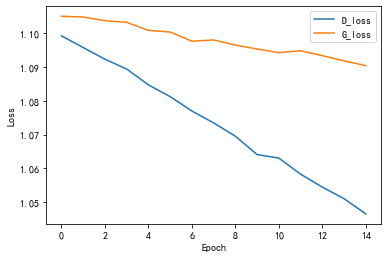

In [41]:
#主函数部分
if __name__ == '__main__':
    input_dim = X_train.shape[1]
    feature_size = X_train.shape[2]
    output_dim = y_train.shape[1]
    
    ## For Bayesian
    opt = {"lr": 0.00016, "epoch": 15, 'bs': 64}

    #generator = make_generator_model(X_train.shape[1], output_dim, X_train.shape[2])
    generator = make_generator_model()
    discriminator = make_discriminator_model()
    gan = GAN(generator, discriminator, opt)
    Predicted_price, Real_price, RMSPE ,history= gan.train(X_train, y_train, yc_train, opt)



In [42]:
history_dict = history
history_dict.keys()

dict_keys(['D_losses', 'G_losses', 'per_epoch_times', 'total_ptime', 'D_tp', 'G_tp', 'D_fp', 'G_fp', 'D_tn', 'G_tn', 'D_fn', 'G_fn', 'D_accuracy', 'G_accuracy', 'D_precision', 'G_precision', 'D_recall', 'G_recall', 'D_auc', 'G_auc', 'D_prc', 'G_prc'])

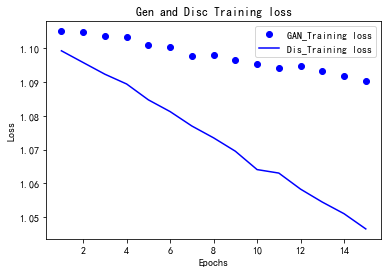

In [43]:
import matplotlib.pyplot as plt

G_acc = history_dict['G_accuracy']
D_acc = history_dict['D_accuracy']
G_loss = history_dict['G_losses']
D_loss = history_dict['D_losses']

epochs = range(1, len(G_acc) + 1)

# “bo”代表 "蓝点"
plt.plot(epochs, G_loss, 'bo', label='GAN_Training loss')
# b代表“蓝色实线”
plt.plot(epochs, D_loss, 'b',  label='Dis_Training loss')
plt.title('Gen and Disc Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [44]:
X_test.shape

(3884, 3, 2)

# 画出ROC出现和其他的指标

In [45]:
# 在测试集上进行测试
G_model = tf.keras.models.load_model('./saveModel/gen_model_3_1_14.h5')
y_predicted = G_model(X_test)

In [46]:
y_predicted

<tf.Tensor: shape=(3884, 3), dtype=float32, numpy=
array([[0.33989516, 0.3353859 , 0.32471886],
       [0.34026095, 0.33559906, 0.32413995],
       [0.34059832, 0.33577678, 0.32362497],
       ...,
       [0.34216964, 0.33596128, 0.32186905],
       [0.34211197, 0.33590525, 0.3219828 ],
       [0.34202477, 0.335892  , 0.32208326]], dtype=float32)>

In [47]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.preprocessing import label_binarize

In [48]:
y_hat = G_model(X_test)

In [49]:
from sklearn.preprocessing import label_binarize
y_test

array([[1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [50]:
y_hat

<tf.Tensor: shape=(3884, 3), dtype=float32, numpy=
array([[0.33989516, 0.3353859 , 0.32471886],
       [0.34026095, 0.33559906, 0.32413995],
       [0.34059832, 0.33577678, 0.32362497],
       ...,
       [0.34216964, 0.33596128, 0.32186905],
       [0.34211197, 0.33590525, 0.3219828 ],
       [0.34202477, 0.335892  , 0.32208326]], dtype=float32)>

调用函数auc： 0.4881583460254698
手动计算auc： 0.4881583460254698


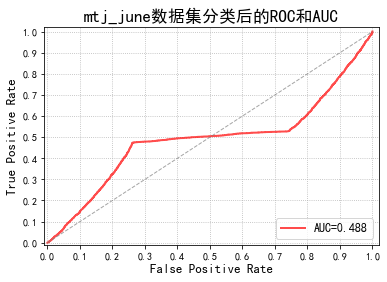

In [51]:
# 计算属于各个类别的概率，返回值的shape = [n_samples, n_classes]
y_score = G_model(X_test).numpy()
# 1、调用函数计算micro类型的AUC
print('调用函数auc：', metrics.roc_auc_score(y_test, y_score, average='micro'))
# 2、手动计算micro类型的AUC
#首先将矩阵y_one_hot和y_score展开，然后计算假正例率FPR和真正例率TPR
fpr, tpr, thresholds = metrics.roc_curve(y_test.ravel(),y_score.ravel())
auc = metrics.auc(fpr, tpr)
print('手动计算auc：', auc)
#绘图
mpl.rcParams['font.sans-serif'] = u'SimHei'
mpl.rcParams['axes.unicode_minus'] = False
#FPR就是横坐标,TPR就是纵坐标
plt.plot(fpr, tpr, c = 'r', lw = 2, alpha = 0.7, label = u'AUC=%.3f' % auc)
plt.plot((0, 1), (0, 1), c = '#808080', lw = 1, ls = '--', alpha = 0.7)
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.grid(b=True, ls=':')
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
plt.title(u'mtj_june数据集分类后的ROC和AUC', fontsize=17)
plt.show()

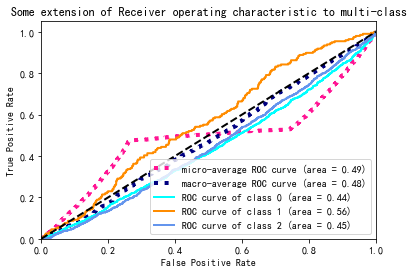

In [52]:
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=3
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [53]:
import numpy
data_x = numpy.random.random((5,3))
data_y = numpy.random.randint(0,2,size=[5,1])


In [54]:
data_x

array([[0.54624975, 0.31735519, 0.83912409],
       [0.32531901, 0.38246311, 0.57467127],
       [0.61928536, 0.97587693, 0.81000583],
       [0.6988156 , 0.44651808, 0.08230305],
       [0.42244766, 0.70344277, 0.64370699]])

In [34]:
data_y

array([[0],
       [1],
       [0],
       [1],
       [0]])

In [35]:
print(numpy.hstack((data_x, data_y)))

[[0.0998891  0.07021195 0.74848094 0.        ]
 [0.37653808 0.67900457 0.41023906 1.        ]
 [0.81969477 0.06333698 0.7339704  0.        ]
 [0.79891187 0.81391302 0.84867722 1.        ]
 [0.18200808 0.5162494  0.27259723 0.        ]]


In [36]:
indices = numpy.random.permutation(data_x.shape[0])


In [37]:
indices

array([1, 3, 0, 2, 4])

In [38]:
# indices = numpy.random.permutation(len(data_x))
rand_data_x = data_x[indices]

In [39]:
rand_data_x

array([[0.37653808, 0.67900457, 0.41023906],
       [0.79891187, 0.81391302, 0.84867722],
       [0.0998891 , 0.07021195, 0.74848094],
       [0.81969477, 0.06333698, 0.7339704 ],
       [0.18200808, 0.5162494 , 0.27259723]])

In [86]:
rand_data_y = data_y[indices]

In [87]:
rand_data_y

array([[0],
       [0],
       [1],
       [1],
       [0]])

In [88]:


print(numpy.hstack((rand_data_x, rand_data_y)))


[[0.08893858 0.15690597 0.56254716 0.        ]
 [0.64190412 0.3563847  0.0901343  0.        ]
 [0.35677336 0.9858885  0.50666205 1.        ]
 [0.32643577 0.27396293 0.27385606 1.        ]
 [0.20656237 0.90162999 0.74541084 0.        ]]


# 至此，GAN模型训练完毕，训练好的模型保存在 /savemodel/gen_model_*_.h5
# 在测试集上进行测试，请转至第四部分